Set-up

In [1]:
!pip install linearmodels -q

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import linearmodels as lm
from platform import python_version
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad

print(python_version())

3.11.6


In [3]:
dist = np.random.default_rng(seed=228)

In [4]:
Y = dist.normal(5, 1, 1000)
W = dist.normal(1, 0.25, 1000)
E = dist.normal(0, 1, 1000)
w = dist.normal(0, 1, (1000, 4))

In [5]:
alpha_0 = 100
alpha_1 = -2
alpha_2 = 1.5
gamma_0 = 5
gamma_1 = 2
gamma_2 = 1

2 Equilibrium Derivation, Part (a)

Text(0.5, 0, 'Y')

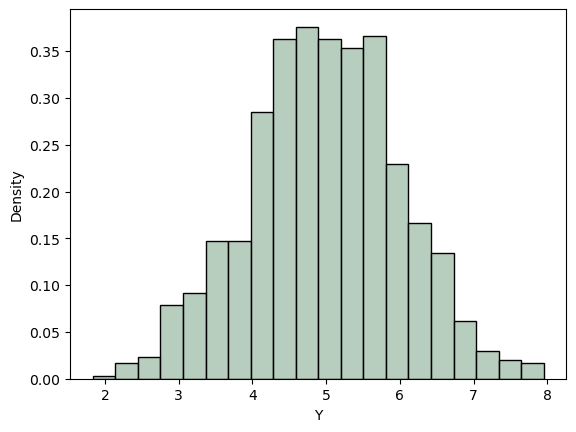

In [6]:
sns.histplot(Y, bins=20, color='#9fbda7', stat='density')
plt.xlabel('Y')

Text(0.5, 0, 'W')

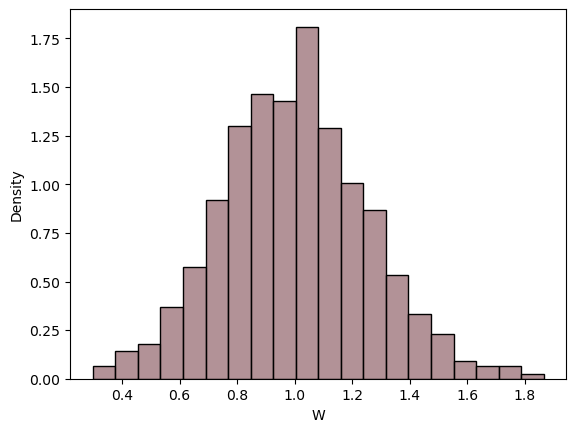

In [7]:
sns.histplot(W, bins=20, color='#996e74', stat='density')
plt.xlabel('W')

Text(0.5, 0, 'Epsilon')

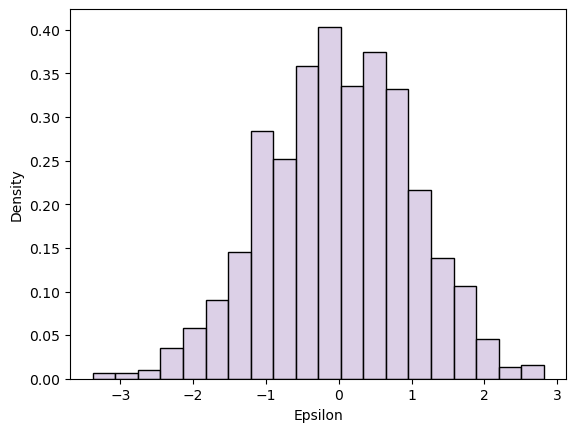

In [8]:
sns.histplot(E, bins=20, color='#d1c1e0', stat='density')
plt.xlabel('Epsilon')

Text(0.5, 0, 'w_i')

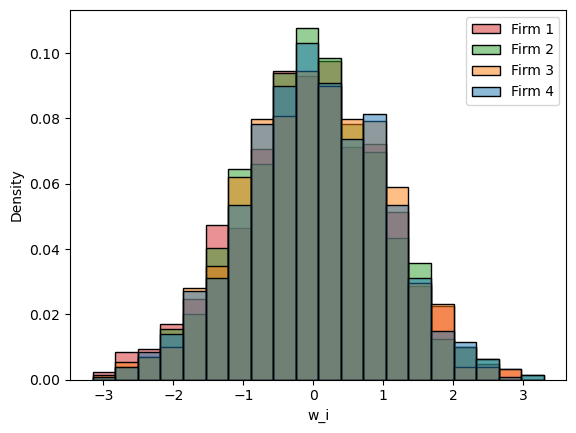

In [9]:
sns.histplot(w, bins=20, stat='density')
plt.legend(['Firm 1', 'Firm 2', 'Firm 3', 'Firm 4'])
plt.xlabel('w_i')

2 Equilibrium Derivation, Part (b)

In [10]:
#solve for eq quantities
A = np.zeros((4, 4))

for i in range(4):
    for j in range(4):
        if i == j:
            A[i][j] = 2*(gamma_2 - alpha_1 )
        else:
            A[i][j] = -alpha_1

A

array([[6., 2., 2., 2.],
       [2., 6., 2., 2.],
       [2., 2., 6., 2.],
       [2., 2., 2., 6.]])

In [11]:
b = np.zeros((4, 1))

b = alpha_0 + alpha_2*Y[:, None] + E[:, None] - gamma_0 - gamma_1 * W[:, None] - w
b

array([[100.51547396, 100.92254438, 101.06052626, 100.35944785],
       [100.34289849, 100.27404375, 100.95082649, 100.85413676],
       [100.42489479, 100.34787045, 100.83357843,  99.642002  ],
       ...,
       [106.96468449, 106.89371054, 105.97350814, 105.37377537],
       [ 98.03480808,  99.00621556, 100.19039575,  97.95786527],
       [100.47489392,  99.33229044, 101.29762507, 100.3733224 ]])

In [12]:
q = np.zeros((1000, 4))
for i in range(1000): 
    q[i, :] = np.linalg.solve(A, b[i, :]) 

In [13]:
#total eq mkt quantity and price
total_Q = np.sum(q, axis=1) 
P = alpha_0 + alpha_1 * total_Q + alpha_2 * Y + E

Text(0.5, 0, 'Firm-Level Equilibrium Quantity')

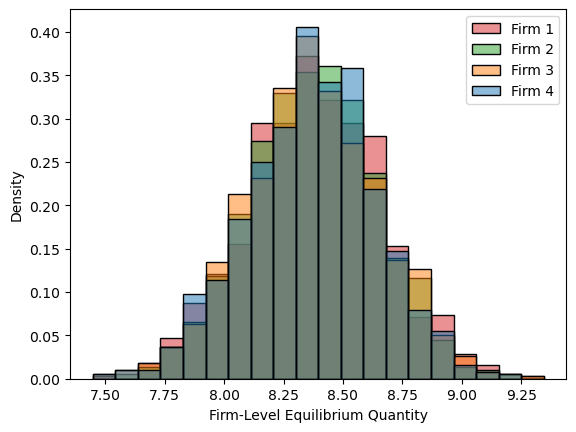

In [14]:
sns.histplot(q, bins=20, color='#d1c1e0', stat='density')
plt.legend(['Firm 1', 'Firm 2', 'Firm 3', 'Firm 4'])
plt.xlabel('Firm-Level Equilibrium Quantity')

In [16]:
print('Mean Firm-level q:', np.mean(q, axis = 0),  'Median Firm-level q:', np.median(q, axis = 0), 'StDev Firm-level q:', np.var(q, axis = 0, ddof = 1))

Mean Firm-level q: [8.36794058 8.36955089 8.37542835 8.37738989] Median Firm-level q: [8.37404618 8.36329761 8.37273028 8.37065387] StDev Firm-level q: [0.07394932 0.07868632 0.07069107 0.07848315]


Text(0.5, 0, 'Total Equilibrium Market Quantity')

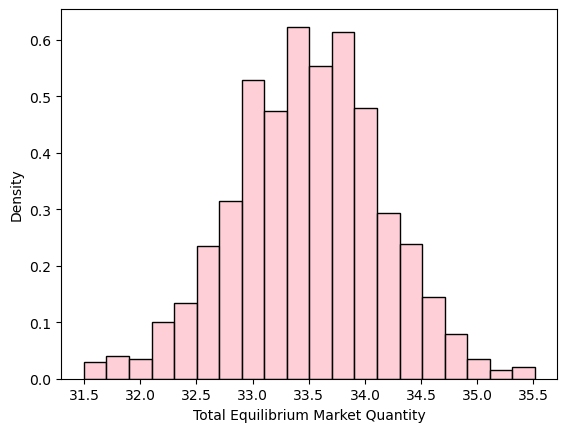

In [17]:
sns.histplot(total_Q, bins=20, color='pink', stat='density')
plt.xlabel('Total Equilibrium Market Quantity')

In [19]:
print('Mean Market-level Q:', np.mean(total_Q), 'Median Market-level Q:', np.median(total_Q), 'StDev Market-level Q:', np.var(total_Q, ddof = 1))

Mean Market-level Q: 33.49030970844591 Median Market-level Q: 33.50080883474189 StDev Market-level Q: 0.4359128741661751


Text(0.5, 0, 'Equilibrium Price')

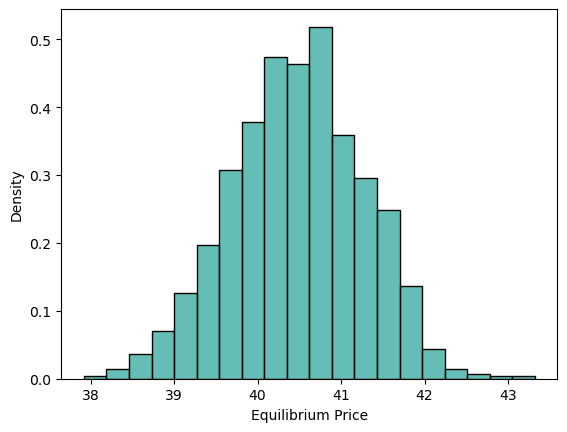

In [20]:
sns.histplot(P, bins=20, color='#32a89d', stat='density')
plt.xlabel('Equilibrium Price')

In [21]:
print('Mean Price:', np.mean(P), 'Median Price:', np.median(P), 'StDev Price:', np.var(P, ddof = 1))

Mean Price: 40.47937333547211 Median Price: 40.48860569640226 StDev Price: 0.6286123867000658


2 Equilibrium Derivation, Part (c)

In [22]:
mc = (gamma_0 + gamma_1 * W[:, None] + w) + 2*gamma_2*q
lerner_firm = (P[:, None] - mc) / P[:, None]
share = q / total_Q[:, None]
lerner_market = np.sum(share * lerner_firm, axis=1)
HHI = np.sum(share ** 2, axis=1)

Text(0.5, 0, 'Market-Level Lerner Index')

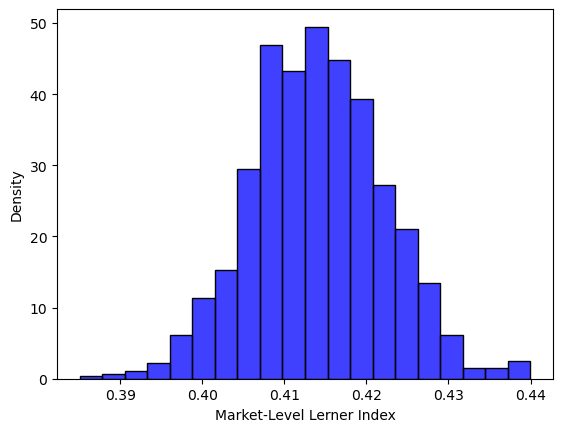

In [23]:
sns.histplot(lerner_market, bins=20, color='blue', stat='density')
plt.xlabel('Market-Level Lerner Index')

In [24]:
print('Mean Lerner Index:', np.mean(lerner_market), 'Median Lerner Index:', np.median(lerner_market), 'StDev Lerner Index:', np.var(lerner_market, ddof = 1))

Mean Lerner Index: 0.4140357752658199 Median Lerner Index: 0.4139470062047481 StDev Lerner Index: 6.699691426234941e-05


Text(0.5, 0, 'HHI')

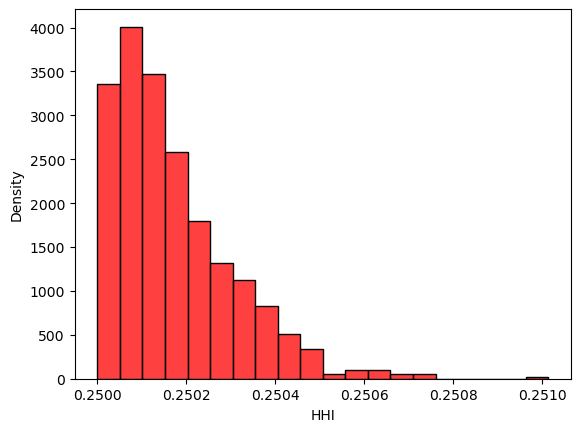

In [26]:
sns.histplot(HHI, bins=20, color='red', stat='density')
plt.xlabel('HHI')

In [25]:
print('Mean HHI:', np.mean(HHI), 'Median HHI:', np.median(HHI), 'StDev HHI:', np.var(HHI, ddof = 1))

Mean HHI: 0.25017210871746276 Median HHI: 0.25013713301090823 StDev HHI: 1.8339543154926565e-08


3 Estimation, Market Power and Concentration, Part (1)

In [27]:
mkt_reg_data = pd.DataFrame({'LR': lerner_market, 'HHI': HHI})
mkt_reg = sm.OLS(endog = mkt_reg_data['LR'], exog = sm.add_constant(mkt_reg_data['HHI'])).fit()
print(mkt_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     LR   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.002445
Date:                Sat, 01 Mar 2025   Prob (F-statistic):              0.961
Time:                        17:45:16   Log-Likelihood:                 3387.0
No. Observations:                1000   AIC:                            -6770.
Df Residuals:                     998   BIC:                            -6760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4377      0.479      0.914      0.3

3 Estimation, Demand and Supply Estimation, Part (1)

In [28]:
d_data = pd.DataFrame({'total_Q': total_Q, 'P': P, 'Y': Y, 'W': W})
d_ols = sm.OLS(endog = d_data['total_Q'], exog = sm.add_constant(d_data[['P', 'Y']])).fit()
print(d_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                total_Q   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     807.0
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          3.74e-209
Time:                        17:45:58   Log-Likelihood:                -521.92
No. Observations:                1000   AIC:                             1050.
Df Residuals:                     997   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.0219      0.820     39.058      0.0

In [29]:
#transform OLS coefficients to parameter values
d_coef_ols = d_ols.params.astype(float)
d_coef_ols
const_ols = float(d_coef_ols["const"]) 
p_coef_ols = float(d_coef_ols["P"])
y_coef_ols = float(d_coef_ols["Y"])
alpha_1_ols = 1 / p_coef_ols
alpha_0_ols = -alpha_1_ols * const_ols
alpha_2_ols = -alpha_1_ols* y_coef_ols
print(alpha_1_ols, alpha_0_ols, alpha_2_ols)

-35.64626768839024 1141.4618173327162 18.648719432806605


In [30]:
avg_q =  np.mean(q, axis=1)
avg_mc = np.mean(mc, axis =1)
avg_mr_ols = alpha_0_ols + alpha_1_ols * avg_q * 2 + alpha_1_ols * (total_Q - avg_q) + alpha_2_ols * Y
mc_data = pd.DataFrame({'avg_q': avg_q, 'P': P, 'Y': Y, 'W': W, 'avg_mc': avg_mc, 'avg_mr_ols': avg_mr_ols})
mc_ols = sm.OLS(endog = mc_data['avg_mr_ols'], exog = sm.add_constant(mc_data[['W', 'avg_q']])).fit()
print(mc_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_mr_ols   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     902.8
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          1.72e-224
Time:                        17:47:08   Log-Likelihood:                -3827.6
No. Observations:                1000   AIC:                             7661.
Df Residuals:                     997   BIC:                             7676.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        416.2946     18.721     22.237      0.0

3 Estimation, Market Power and Concentration, Part (2)

In [31]:
d_2sls = lm.IV2SLS(dependent = d_data['total_Q'], 
                   exog = sm.add_constant(d_data[['Y']]), 
                   endog = d_data['P'], 
                   instruments = d_data['W']).fit()
print(d_2sls.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                total_Q   R-squared:                      0.4893
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4883
No. Observations:                1000   F-statistic:                    1237.4
Date:                Sat, Mar 01 2025   P-value (F-stat)                0.0000
Time:                        17:49:45   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          47.011     1.5243     30.840     0.0000      44.023      49.999
Y              0.7240     0.0255     28.371     0.00

In [32]:
d_coef_2sls = d_2sls.params.astype(float)
d_coef_2sls
const_2sls = float(d_coef_2sls["const"]) 
p_coef_2sls = float(d_coef_2sls["P"])
y_coef_2sls = float(d_coef_2sls["Y"])
alpha_1_2sls = 1 / p_coef_2sls
alpha_0_2sls = -alpha_1_2sls * const_2sls
alpha_2_2sls = -alpha_1_2sls* y_coef_2sls
print(alpha_1_2sls, alpha_0_2sls, alpha_2_2sls)

avg_mr_2sls = alpha_0_2sls + alpha_1_2sls * avg_q * 2 + alpha_1_2sls * (total_Q - avg_q) + alpha_2_2sls * Y
mc_data_2sls = pd.DataFrame({'avg_q': avg_q, 'P': P, 'Y': Y, 'W': W, 'avg_mc': avg_mc, 'avg_mr_2sls': avg_mr_2sls})

-2.3638683941789975 111.12773537238948 1.7114006972628324


In [33]:
mc_2sls = lm.IV2SLS(dependent = mc_data_2sls['avg_mr_2sls'], 
                   exog = sm.add_constant(mc_data_2sls[['W']]), 
                   endog = mc_data_2sls['avg_q'], 
                   instruments = mc_data_2sls['Y']).fit()
print(mc_2sls.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:            avg_mr_2sls   R-squared:                     -0.0563
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0584
No. Observations:                1000   F-statistic:                    159.86
Date:                Sat, Mar 01 2025   P-value (F-stat)                0.0000
Time:                        17:53:57   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          5.5431     2.7477     2.0173     0.0437      0.1576      10.929
W              2.0775     0.1656     12.542     0.00

/opt/conda/lib/python3.11/site-packages/linearmodels/shared/linalg.py:64: RuntimeWarning: invalid value encountered in sqrt
  return vecs @ np.diag(1 / np.sqrt(vals)) @ vecs.T


In [34]:
mc_coef_2sls = mc_2sls.params.astype(float)
mc_coef_2sls

gamma_0_2sls = float(mc_coef_2sls["const"]) 
gamma_1_2sls = float(mc_coef_2sls["W"]) 
gamma_2_2sls = float(mc_coef_2sls["avg_q"]) / 2
print(gamma_0_2sls, gamma_1_2sls, gamma_2_2sls)

5.543093661946738 2.077477842491159 0.7804266016010449


4 Counterfactual Analysis, Numerical Analysis

In [36]:
A_2sls = np.zeros((4, 4))

for i in range(4):
    for j in range(4):
        if i == j:
            A_2sls[i][j] = 2*(gamma_2_2sls - alpha_1_2sls )
        else:
            A_2sls[i][j] = -alpha_1_2sls

A_2sls

array([[6.28858999, 2.36386839, 2.36386839, 2.36386839],
       [2.36386839, 6.28858999, 2.36386839, 2.36386839],
       [2.36386839, 2.36386839, 6.28858999, 2.36386839],
       [2.36386839, 2.36386839, 2.36386839, 6.28858999]])

In [37]:
b_2sls = np.zeros((4, 1))

b_2sls = alpha_0_2sls + alpha_2_2sls*Y[:, None] + E[:, None] - gamma_0_2sls - gamma_1_2sls * W[:, None] - w

q_2sls = np.zeros((1000, 4))
for i in range(1000): 
    q_2sls[i, :] = np.linalg.solve(A_2sls, b_2sls[i, :]) 

total_Q_2sls = np.sum(q_2sls, axis=1) 
P_2sls = alpha_0_2sls + alpha_1_2sls * total_Q_2sls + alpha_2_2sls * Y + E

Text(0.5, 0, '(2SLS) Firm-Level Equilibrium Quantity')

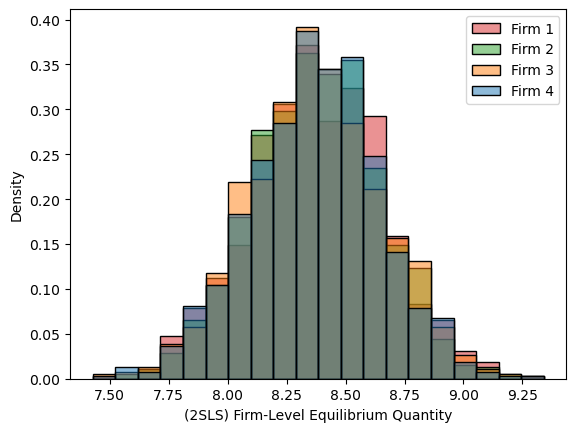

In [38]:
sns.histplot(q_2sls, bins=20, color='#d1c1e0', stat='density')
plt.legend(['Firm 1', 'Firm 2', 'Firm 3', 'Firm 4'])
plt.xlabel('(2SLS) Firm-Level Equilibrium Quantity')

In [40]:
print('Mean Firm-level q (Pre-Change):', np.mean(q_2sls, axis = 0),  'Median Firm-level q (Pre-Change):', np.median(q_2sls, axis = 0), 'StDev Firm-level q (Pre-Change):', np.var(q_2sls, axis = 0, ddof = 1))

Mean Firm-level q (Pre-Change): [8.36812401 8.3697652  8.3757554  8.37775457] Median Firm-level q (Pre-Change): [8.37572585 8.3625065  8.37624331 8.37392775] StDev Firm-level q (Pre-Change): [0.07457061 0.0797742  0.07125494 0.07878363]


Text(0.5, 0, '(2SLS) Total Equilibrium Market Quantity')

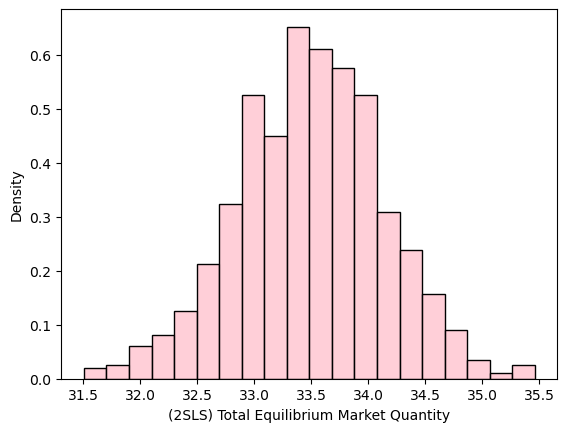

In [41]:
sns.histplot(total_Q_2sls, bins=20, color='pink', stat='density')
plt.xlabel('(2SLS) Total Equilibrium Market Quantity')

In [42]:
print('Mean Market-level Q (Pre-Change):', np.mean(total_Q_2sls, axis = 0),  'Median Market-level Q (Pre-Change):', np.median(total_Q_2sls, axis = 0), 'StDev Market-level Q (Pre-Change):', np.var(total_Q_2sls, axis = 0, ddof = 1))

Mean Market-level Q (Pre-Change): 33.49139918314459 Median Market-level Q (Pre-Change): 33.5070640719223 StDev Market-level Q (Pre-Change): 0.41633418581875464


Text(0.5, 0, '(2SLS) Equilibrium Price')

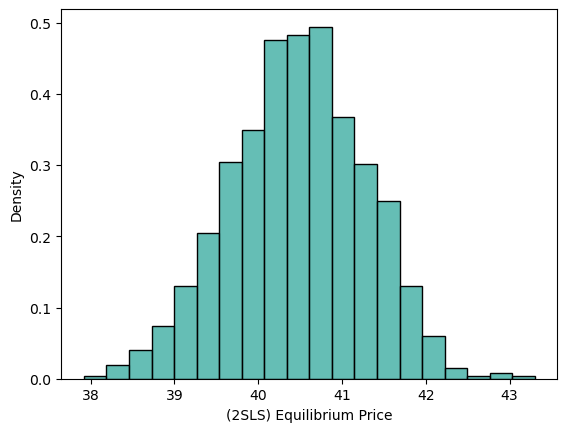

In [43]:
sns.histplot(P_2sls, bins=20, color='#32a89d', stat='density')
plt.xlabel('(2SLS) Equilibrium Price')

In [44]:
print('Mean P (Pre-Change):', np.mean(P_2sls, axis = 0),  'Median P (Pre-Change):', np.median(P_2sls, axis = 0), 'StDev P (Pre-Change):', np.var(P_2sls, axis = 0, ddof = 1))

Mean P (Pre-Change): 40.470693549648814 Median P (Pre-Change): 40.4799876199651 StDev P (Pre-Change): 0.6458487650361497


In [45]:
gamma_0_2sls_new = gamma_0_2sls / 2

A_2sls_new = A_2sls

b_2sls_new = np.zeros((4, 1))

b_2sls_new = alpha_0_2sls + alpha_2_2sls*Y[:, None] + E[:, None] - gamma_0_2sls_new - gamma_1_2sls * W[:, None] - w

q_2sls_new = np.zeros((1000, 4))
for i in range(1000): 
    q_2sls_new[i, :] = np.linalg.solve(A_2sls_new, b_2sls_new[i, :]) 

total_Q_2sls_new = np.sum(q_2sls_new, axis=1) 
P_2sls_new = alpha_0_2sls + alpha_1_2sls * total_Q_2sls_new + alpha_2_2sls * Y + E

Text(0.5, 0, 'Counterfactual (2SLS) Firm-Level Equilibrium Quantity')

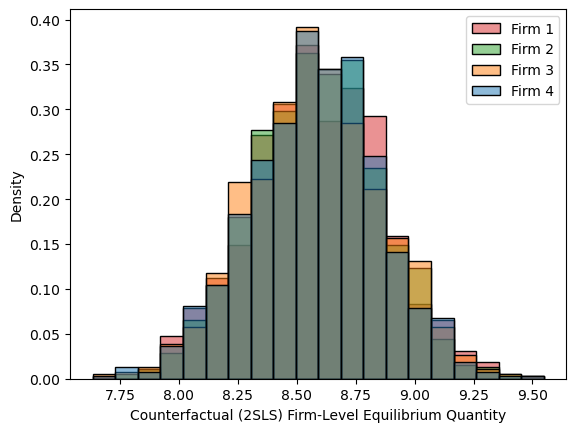

In [46]:
sns.histplot(q_2sls_new, bins=20, color='#d1c1e0', stat='density')
plt.legend(['Firm 1', 'Firm 2', 'Firm 3', 'Firm 4'])
plt.xlabel('Counterfactual (2SLS) Firm-Level Equilibrium Quantity')

In [47]:
print('Mean Firm-level q (After MC Change):', np.mean(q_2sls_new, axis = 0),  'Median Firm-level q (After MC Change):', np.median(q_2sls_new, axis = 0), 'StDev Firm-level q (After MC Change):', np.var(q_2sls_new, axis = 0, ddof = 1))

Mean Firm-level q (After MC Change): [8.57526201 8.5769032  8.5828934  8.58489257] Median Firm-level q (After MC Change): [8.58286385 8.5696445  8.5833813  8.58106575] StDev Firm-level q (After MC Change): [0.07457061 0.0797742  0.07125494 0.07878363]


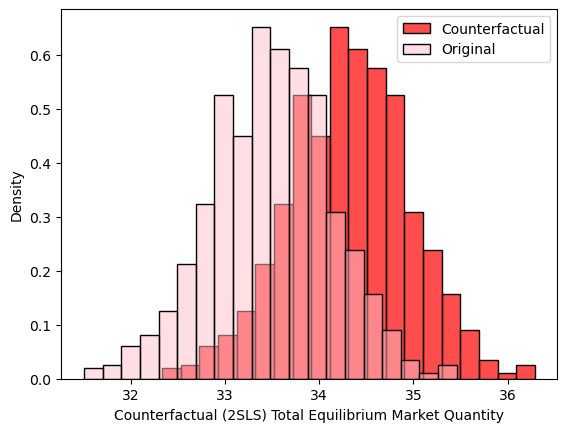

In [49]:
sns.histplot(total_Q_2sls_new, bins=20, color='red', stat='density', alpha=0.7, label="Counterfactual")
sns.histplot(total_Q_2sls, bins=20, color='pink', stat='density', alpha=0.5, label="Original")

plt.xlabel('Counterfactual (2SLS) Total Equilibrium Market Quantity')
plt.legend()
plt.show()

In [50]:
print('Mean Market-level Q (After MC Change):', np.mean(total_Q_2sls_new, axis = 0),  'Median Market-level Q (After MC Change):', np.median(total_Q_2sls_new, axis = 0), 'StDev Market-level Q (After MC Change):', np.var(total_Q_2sls_new, axis = 0, ddof = 1))

Mean Market-level Q (After MC Change): 34.31995117208383 Median Market-level Q (After MC Change): 34.335616060861554 StDev Market-level Q (After MC Change): 0.41633418581875486


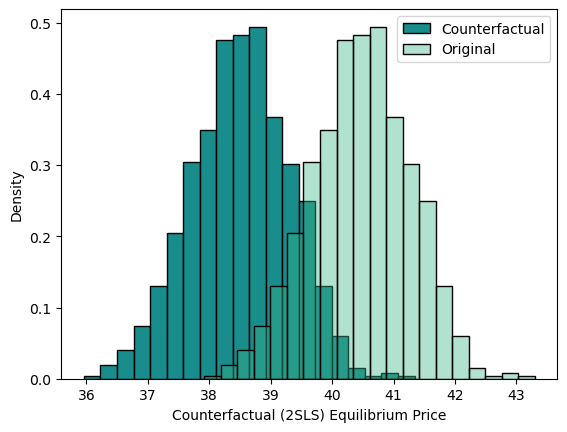

In [51]:
sns.histplot(P_2sls_new, bins=20, color='#008080', stat='density', alpha=0.9, label="Counterfactual")
sns.histplot(P_2sls, bins=20, color='#3EB489', stat='density', alpha=0.4, label="Original")

plt.xlabel('Counterfactual (2SLS) Equilibrium Price')
plt.legend()
plt.show()

In [52]:
print('Mean P (After MC Change):', np.mean(P_2sls_new, axis = 0),  'Median P (After MC Change):', np.median(P_2sls_new, axis = 0), 'StDev P (After MC Change):', np.var(P_2sls_new, axis = 0, ddof = 1))

Mean P (After MC Change): 38.512105690061176 Median P (After MC Change): 38.52139976037746 StDev P (After MC Change): 0.6458487650361483
